In [199]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
import joblib
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from xgboost import plot_importance
from scipy.stats import boxcox


from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, roc_curve, confusion_matrix

In [2]:
from catboost import CatBoostClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore' )

In [4]:

sns.set(font_scale=1.5)

In [36]:
import six
import operator
import sys
sys.modules['sklearn.externals.six'] = six

import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from sklearn.utils import _safe_indexing
sys.modules['sklearn.utils.safe_indexing'] = sklearn.utils._safe_indexing

In [5]:
data = pd.read_csv('C:/Users/J.C/Desktop/PROJECTS-CHINONSO/Data-Science-Projects/Projects/Bankruptcy Prediction/data.csv')

In [6]:
data.shape

(6819, 96)

In [7]:
len(data)

6819

In [8]:
data.head(10)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1
5,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,0.781069,...,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534,1
6,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,...,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663,0
7,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,...,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889,0
8,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,0.781598,...,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826,0
9,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,0.781574,...,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801,0


In [9]:
data.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [10]:
df = data.copy()

In [11]:
check_null = df.isna()
check_null

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# df['Bankrupt?'].isna().sum()

In [13]:

df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [14]:
df['Bankrupt?'].value_counts(normalize=True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

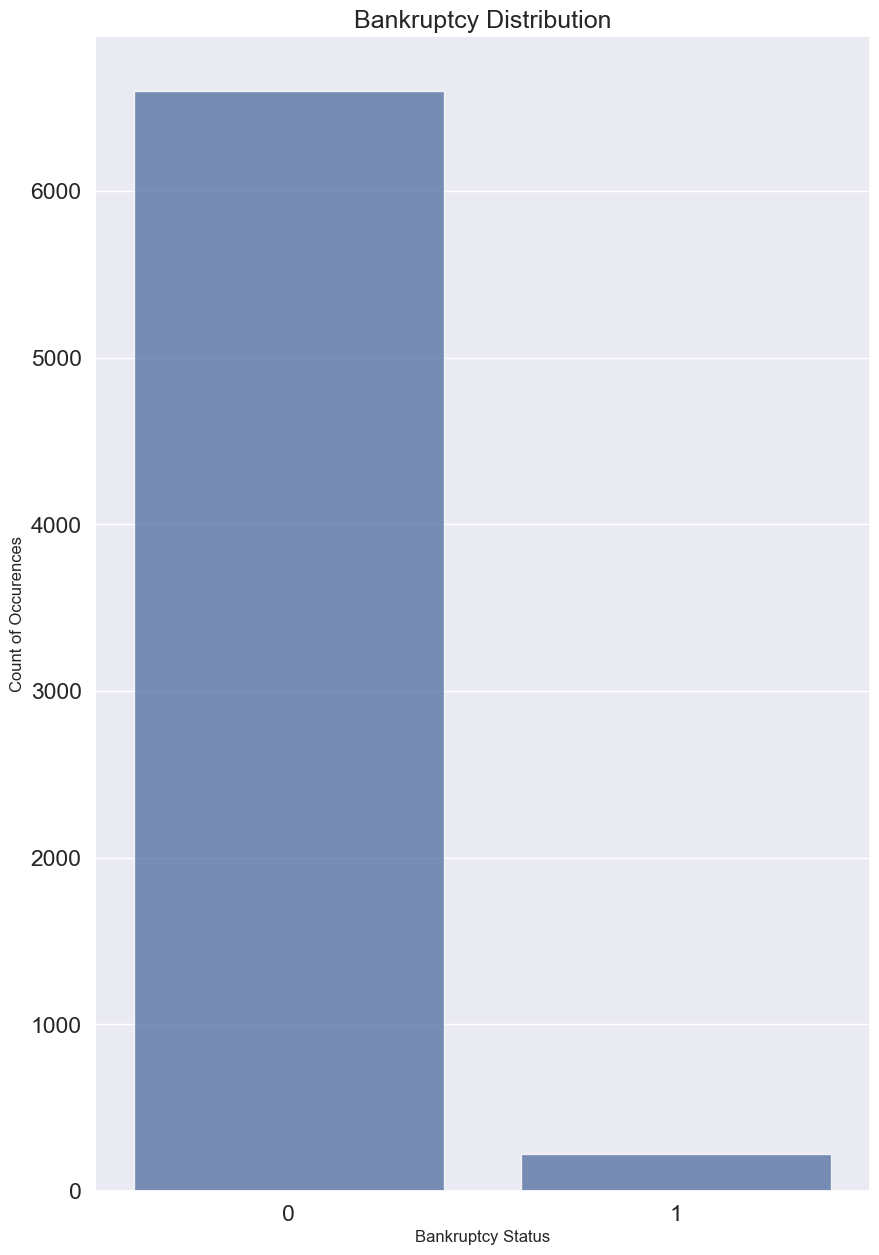

In [15]:
status = df['Bankrupt?'].value_counts()


plt.figure(figsize=(10,15))
sns.countplot(x='Bankrupt?', data=df, alpha=0.8)
plt.title('Bankruptcy Distribution')
plt.ylabel('Count of Occurences', fontsize=12)
plt.xlabel('Bankruptcy Status', fontsize=12)
plt.show()

In [16]:
size = int(len(df) * 0.95)
size

6478

In [17]:
df_train, df_test = df[:size], df[size:]

In [18]:
# df_train.shape
df_train['Bankrupt?'].value_counts()

Bankrupt?
0    6267
1     211
Name: count, dtype: int64

In [19]:
df_train.columns.to_list()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

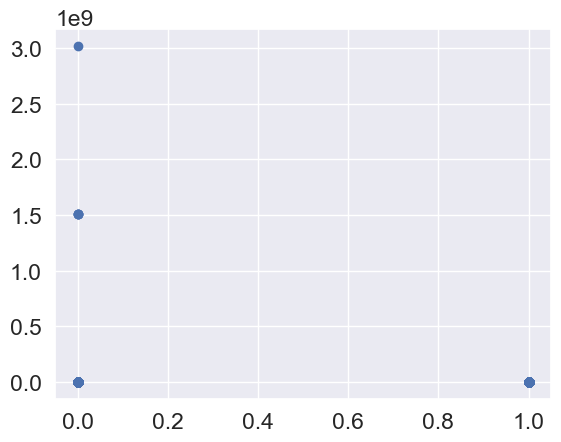

In [20]:
plt.scatter(df_train['Bankrupt?'], df_train[' Revenue Per Share (Yuan ¥)'])


In [21]:
X = df_train.drop(columns='Bankrupt?', axis=1)
y = df_train['Bankrupt?']

In [22]:
X.shape

(6478, 95)

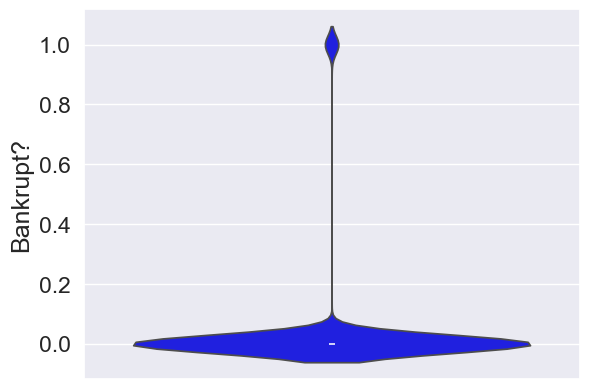

In [23]:
sns.violinplot(y=df_train['Bankrupt?'], orient='v', color='Blue', data=df_train)
plt.show()

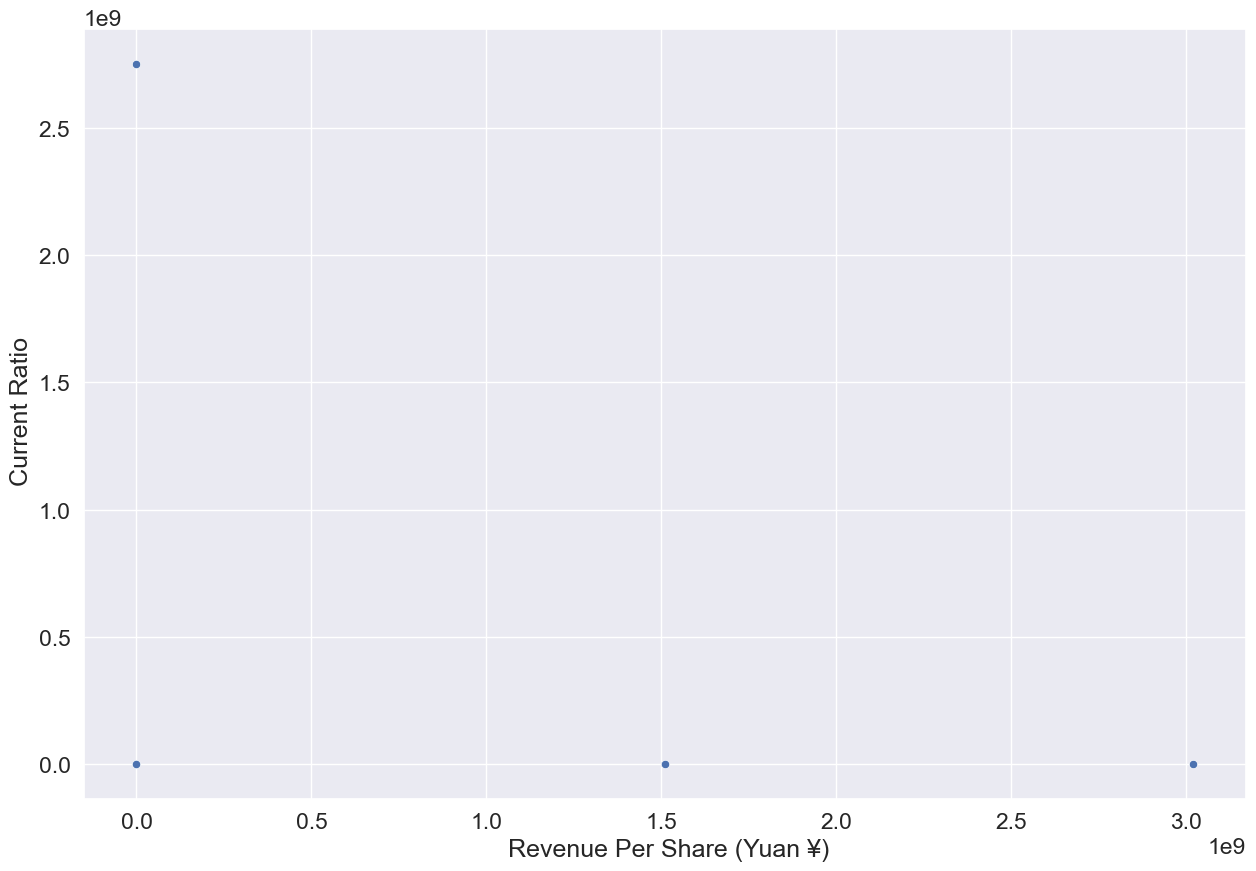

In [24]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(data=df_train, x=' Revenue Per Share (Yuan ¥)', y=' Current Ratio')
plt.show()

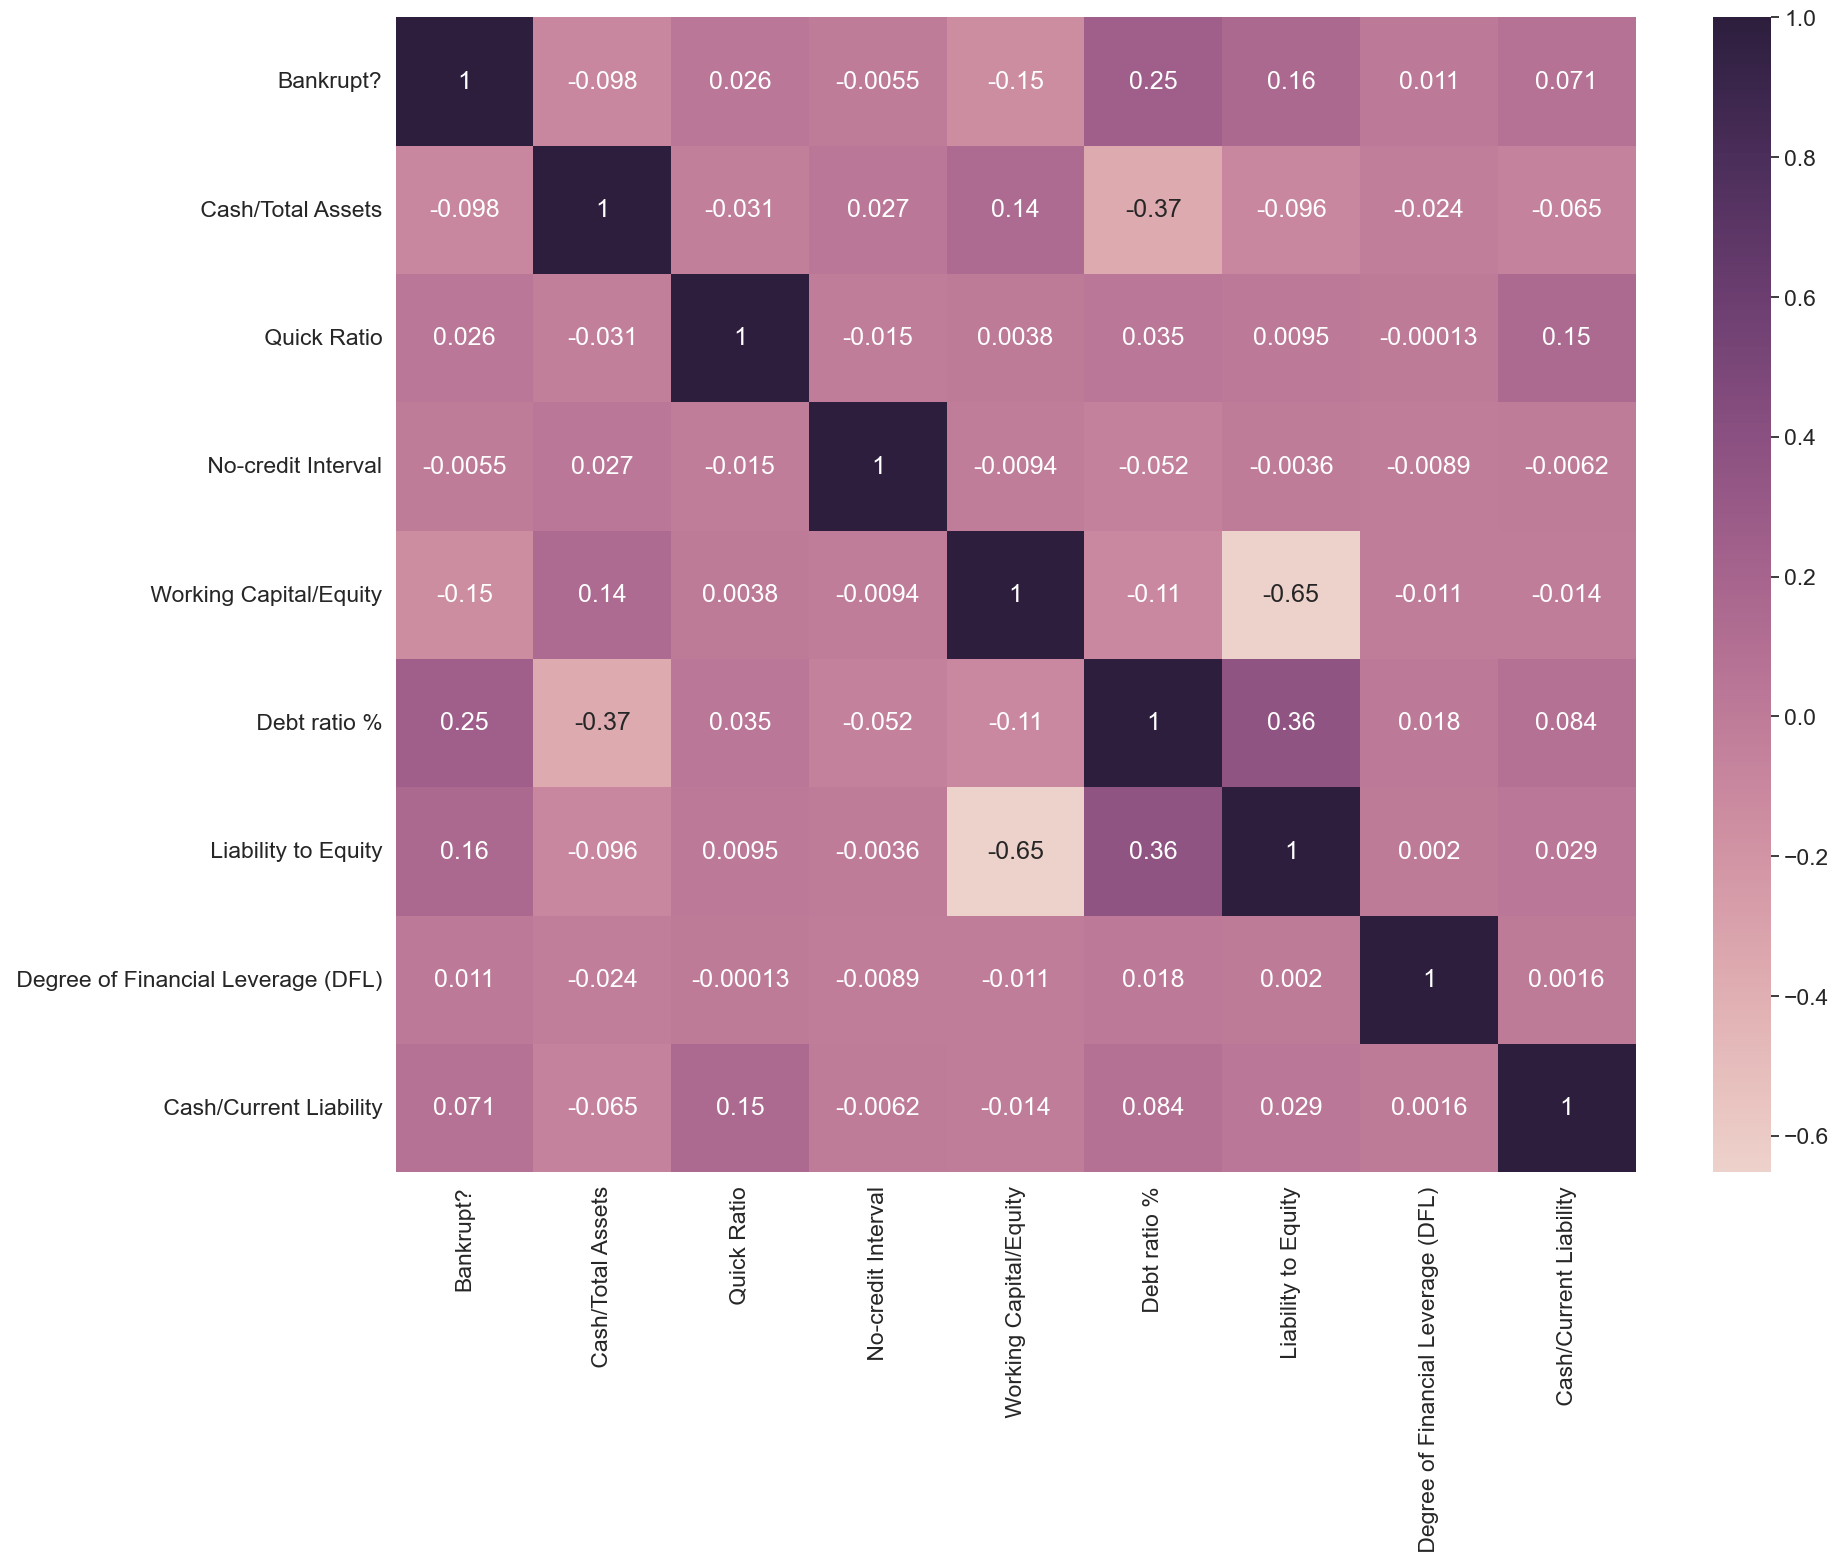

In [25]:
fig, ax = plt.subplots(figsize=(20,15))
corr = df_train[['Bankrupt?', ' Cash/Total Assets', ' Quick Ratio', ' No-credit Interval', ' Working Capital/Equity', ' Debt ratio %',' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Cash/Current Liability']].corr()
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
plt.show()

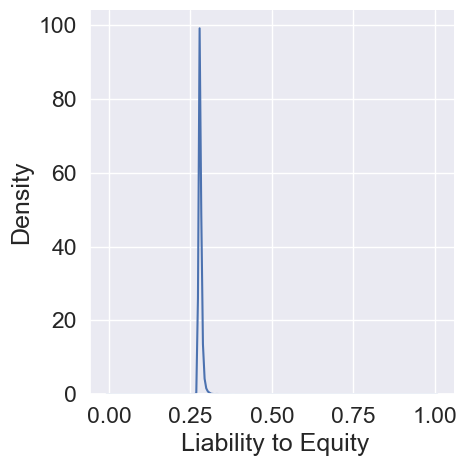

In [26]:
sns.displot(df_train[' Liability to Equity'], kind='kde')

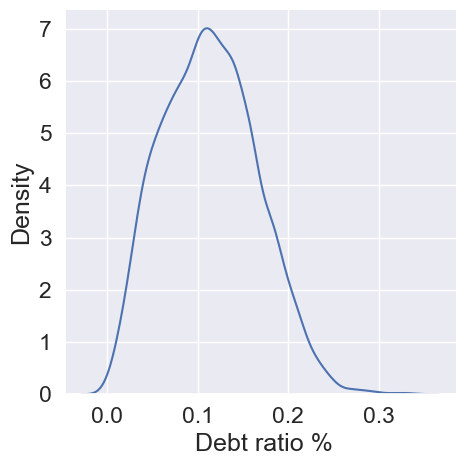

In [27]:
sns.displot(df_train[' Debt ratio %'], kind='kde')

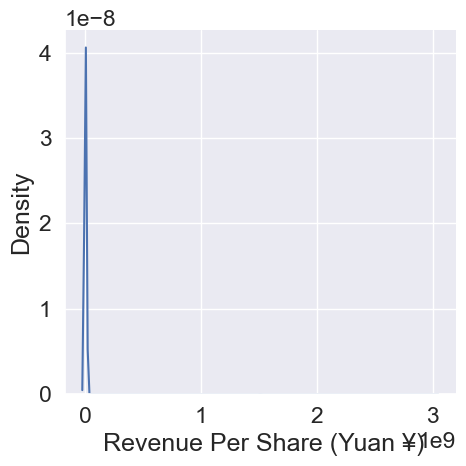

In [28]:
sns.displot(df_train[' Revenue Per Share (Yuan ¥)'], kind='kde')

In [30]:
#we have an unbalanced class we might want to resample

from imblearn.combine import SMOTETomek

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
df_train[' Debt ratio %'].quantile([.2, 0.75, 0.90,.95,0.99,.999])

0.200    0.064528
0.750    0.149885
0.900    0.184297
0.950    0.203292
0.990    0.238311
0.999    0.294483
Name:  Debt ratio %, dtype: float64

### Generating synthetic data to balance the class 



### Defining functions to classify data and detect important features

### 
Classification

In [41]:
def classify(model, X, y, X_test, y_test):
    #pass the train and test set to the model and fit
    model.fit(X, y)

    #getting the prediction probalities

    y1 = model.predict_proba(X_test)
    y2 = model.predict(X_test)

    print("Accuracy: " , metrics.accuracy_score(y_test, y2))
    print("Area Under the ROC Curve: ", roc_auc_score(y_test, y1[:, 1]))
    #other metrics
    print("\n")
    print("F-metric: ", metrics.f1_score(y_test, y2))
    print("\n")
    print("Classification Report:")
    print(metrics.classification_report(y_test, y2))
    print("\n")
    print("Evaluation by cross-validation:")
    print(cross_val_score(model, X, y))

    return model, y1[:, 1], y2

### 
Detecting important features

In [71]:
X_train_1 = X_train.iloc[:, :30].copy()
X_test_1 = X_test.iloc[:, :30].copy()

In [185]:
# #the plot for the feature importance appeared congested so I reduced the features by indexing
# X_train_2 = X_train.iloc[:, 60:94].copy()
# X_test_2 = X_test.iloc[:,  60:94].copy()

In [188]:
def feat_importance(model):
    feature_importance = {}

    #set the dataframe
    for index, name in enumerate(X_train.columns):
        feature_importance[name] = model.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)

    return sorted_x

### 
Model to predict the ROC Curve for each model and determine the best one

In [409]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):

    clfs = {'GradientBoosting' : GradientBoostingClassifier(max_depth =12, n_estimators = 100, max_features=0.3),
             'DecisionTree' : DecisionTreeClassifier(max_depth=15, max_features=0.3),
             'RandomForest' : RandomForestClassifier(n_estimators=100, max_depth=15, max_features=0.3),
             'XGBClassifier' : XGBClassifier(),
             'CatBoost' : CatBoostClassifier(iterations=10, learning_rate=0.1, depth=15)
           }

    #evaluation dataframe
    cols = ['model', 'matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score']
    
    models_report = pd.DataFrame(columns=cols)
    conf_matrix = {}

    for clf, clf_name in zip(clfs.values(), clfs.keys()):
        
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:, 1]

        print('Processing {} - {}'.format(clf_name, model_type))

        # 'model_type': model_type,
        
        tmp = pd.Series({
                         'model' : clf_name,
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'roc_auc_score' : roc_auc_score(y_test, y_score),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})
        
        results = pd.DataFrame(tmp).transpose()
        
        models_report = pd.concat([models_report, results], axis=0)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=False)
        fpr, tpr, thresholds = roc_curve(y_test, y_score, drop_intermediate=False, pos_label =1)

        plt.figure(1, figsize=(8,8))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})

    plt.plot([0,1], [0,1], color = 'black')

    return models_report, conf_matrix

### ]
Accuracy and feature importance on xgbclassifier

Accuracy:  0.9699074074074074
Area Under the ROC Curve:  0.947857351083471


F-metric:  0.38095238095238093


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1255
           1       0.55      0.29      0.38        41

    accuracy                           0.97      1296
   macro avg       0.76      0.64      0.68      1296
weighted avg       0.96      0.97      0.97      1296



Evaluation by cross-validation:
[0.96914176 0.9710704  0.97007722 0.97200772 0.97104247]
[8.1877103e-03 1.4605577e-02 3.0320935e-02 9.1765858e-03 1.3723946e-03
 8.1874244e-03 1.8817954e-02 4.7255452e-03 1.1839236e-02 1.0251653e-02
 5.5543003e-03 2.9999362e-03 7.3801931e-03 1.4554169e-02 9.1691604e-03
 3.2451034e-03 9.2609487e-03 2.3456896e-03 5.6251515e-02 2.7507921e-03
 8.0347080e-03 3.7212661e-03 9.6028903e-03 3.0782251e-03 5.7932911e-03
 4.7088251e-03 2.4788808e-03 2.7373992e-03 1.9356917e-03 3.1288728e-02
 7.2663012e-03 1.355026

<Figure size 2000x1500 with 0 Axes>

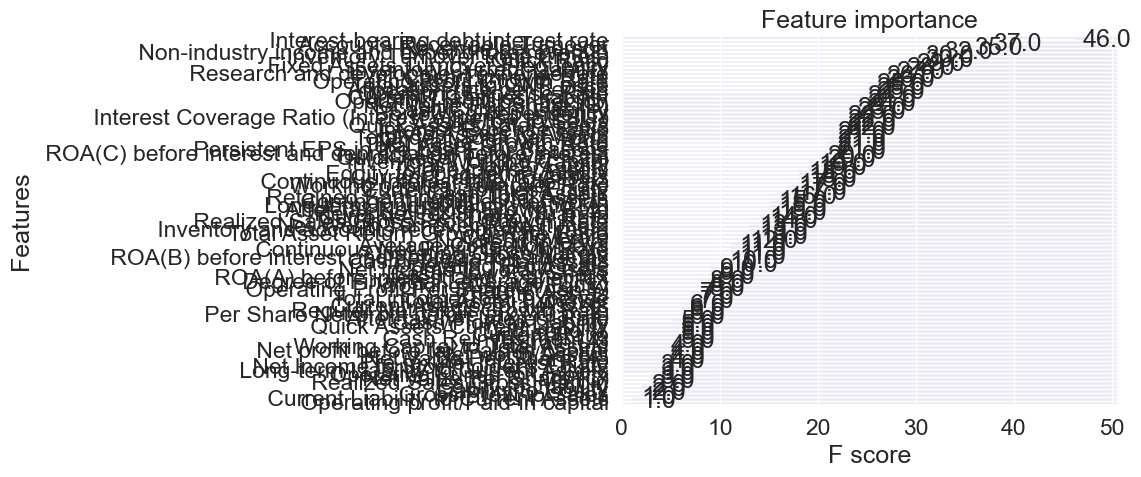

In [189]:
plt.figure(figsize=(20,15))
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train, X_test, y_test)
print(xgb0.feature_importances_)
plot_importance(xgb0)
plt.show()
feat1 = feat_importance(xgb0)

###

The most impottant feature appears to be - Interest bearing debt interest rate

In [174]:
feat1.sort()
feat1

[(' Accounts Receivable Turnover', 0.009865611),
 (' After-tax Net Profit Growth Rate', 0.004708825),
 (' After-tax net Interest Rate', 0.004725545),
 (' Allocation rate per person', 0.0062852465),
 (' Average Collection Days', 0.0008801941),
 (' Borrowing dependency', 0.025132297),
 (' CFO to Assets', 0.003798204),
 (' Cash Flow Per Share', 0.002750792),
 (' Cash Flow to Equity', 0.0036188725),
 (' Cash Flow to Liability', 0.0009799062),
 (' Cash Flow to Sales', 0.0068950085),
 (' Cash Flow to Total Assets', 0.001996797),
 (' Cash Reinvestment %', 0.013550264),
 (' Cash Turnover Rate', 0.0044674),
 (' Cash flow rate', 0.007380193),
 (' Cash/Current Liability', 0.002565983),
 (' Cash/Total Assets', 0.0069712466),
 (' Contingent liabilities/Net worth', 0.0060273404),
 (' Continuous Net Profit Growth Rate', 0.0027373992),
 (' Continuous interest rate (after tax)', 0.010251653),
 (' Current Asset Turnover Rate', 0.007765794),
 (' Current Assets/Total Assets', 0.0065363087),
 (' Current Li

In [161]:
feat1[0][0]

" Net Income to Stockholder's Equity"

### 
Checking importance with our defined function. 

In [178]:
#converting output of our feature_importance function to data frame
list = []
for i in range(0, 95):
    value = feat1[i][1]
    list.append(value)


cols = X_train.columns.tolist()
cols.sort()
cols


In [179]:

dict = {"Features" : cols, "Feature_Importance": list}
dict
feat_data = pd.DataFrame(dict)
# # print(len(cols), len(list))
feat_data.sort_values(by='Feature_Importance', ascending=False)
# feat_data

,Features,Feature_Importance
48,Net Income to Stockholder's Equity,0.296571
68,Persistent EPS in the Last Four Seasons,0.056252
49,Net Income to Total Assets,0.033798
50,Net Value Growth Rate,0.031289
31,Equity to Liability,0.031011
...,...,...
35,Gross Profit to Sales,0.000270
27,Current Liability to Liability,0.000000
26,Current Liability to Equity,0.000000
44,Liability-Assets Flag,0.000000


In [408]:
#training with different parameters
# catboost, y_pred_b, y_pred2_b = classify(CatBoostClassifier(iterations=5, learning_rate=0.01, depth=15), X_train, y_train, X_test, y_test)

### Catboost seems to be performing well, even predicting the minority class (1) with a precision of 67%

In [198]:
#checking xgbclassifier again

xgb0, y_pred_b, y_pred_2b = classify(XGBClassifier(n_estimatos=50, learning_rate=0.015), X_train, y_train, X_test, y_test)

Accuracy:  0.9714506172839507
Area Under the ROC Curve:  0.9430570401321543


F-metric:  0.3018867924528302


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1255
           1       0.67      0.20      0.30        41

    accuracy                           0.97      1296
   macro avg       0.82      0.60      0.64      1296
weighted avg       0.96      0.97      0.96      1296



Evaluation by cross-validation:
[0.96914176 0.96721311 0.97007722 0.97007722 0.97200772]


### Okay, XGBClassifier seems to have upped its game, improving on the unbalanced class with recall and f1_score values better that CatBoostClassifier

In [200]:
#Checking RandomForest

rf, y_p, y_p1 = classify(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.9729938271604939
Area Under the ROC Curve:  0.9071713147410359


F-metric:  0.36363636363636365


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1255
           1       0.71      0.24      0.36        41

    accuracy                           0.97      1296
   macro avg       0.85      0.62      0.67      1296
weighted avg       0.97      0.97      0.97      1296



Evaluation by cross-validation:
[0.97396336 0.96914176 0.96911197 0.96911197 0.96718147]


In [201]:
#checking GradientBoosing
gb, y_3, y_3p = classify(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.9691358024691358
Area Under the ROC Curve:  0.9222135846856476


F-metric:  0.375


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1255
           1       0.52      0.29      0.38        41

    accuracy                           0.97      1296
   macro avg       0.75      0.64      0.68      1296
weighted avg       0.96      0.97      0.96      1296



Evaluation by cross-validation:
[0.9710704  0.96624879 0.97200772 0.96911197 0.96718147]


In [202]:
#checking logistic regression
log_reg, p1, p2 = classify(LogisticRegression(), X_train, y_train, X_test, y_test)

Accuracy:  0.9629629629629629
Area Under the ROC Curve:  0.501545039354776


F-metric:  0.0


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1255
           1       0.00      0.00      0.00        41

    accuracy                           0.96      1296
   macro avg       0.48      0.50      0.49      1296
weighted avg       0.94      0.96      0.95      1296



Evaluation by cross-validation:
[0.96721311 0.96142719 0.96718147 0.96428571 0.96138996]


In [203]:
#decision tree
dt, pred_1, pred_2 = classify(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.9529320987654321
Area Under the ROC Curve:  0.6335924594305704


F-metric:  0.2823529411764706


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1255
           1       0.27      0.29      0.28        41

    accuracy                           0.95      1296
   macro avg       0.62      0.63      0.63      1296
weighted avg       0.95      0.95      0.95      1296



Evaluation by cross-validation:
[0.95178399 0.94792671 0.94498069 0.95656371 0.94787645]


### 
Running the models at once

Processing GradientBoosting - Non-balanced
Processing DecisionTree - Non-balanced
Processing RandomForest - Non-balanced
Processing XGBClassifier - Non-balanced
0:	learn: 0.5360209	total: 21.5s	remaining: 3m 13s
1:	learn: 0.4135773	total: 37.8s	remaining: 2m 31s
2:	learn: 0.3175067	total: 56.7s	remaining: 2m 12s
3:	learn: 0.2562013	total: 1m 13s	remaining: 1m 49s
4:	learn: 0.2185066	total: 1m 28s	remaining: 1m 28s
5:	learn: 0.1835243	total: 1m 44s	remaining: 1m 9s
6:	learn: 0.1586320	total: 2m	remaining: 51.6s
7:	learn: 0.1375031	total: 2m 17s	remaining: 34.3s
8:	learn: 0.1273587	total: 2m 32s	remaining: 16.9s
9:	learn: 0.1140749	total: 2m 47s	remaining: 0us
Processing CatBoost - Non-balanced


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score
0,GradientBoosting,0.407577,0.931163,0.714286,0.243902,0.363636
0,DecisionTree,0.214648,0.421145,0.257143,0.219512,0.236842
0,RandomForest,0.350747,0.927869,0.666667,0.195122,0.301887
0,XGBClassifier,0.385769,0.947857,0.545455,0.292683,0.380952
0,CatBoost,0.310173,0.919153,0.533333,0.195122,0.285714


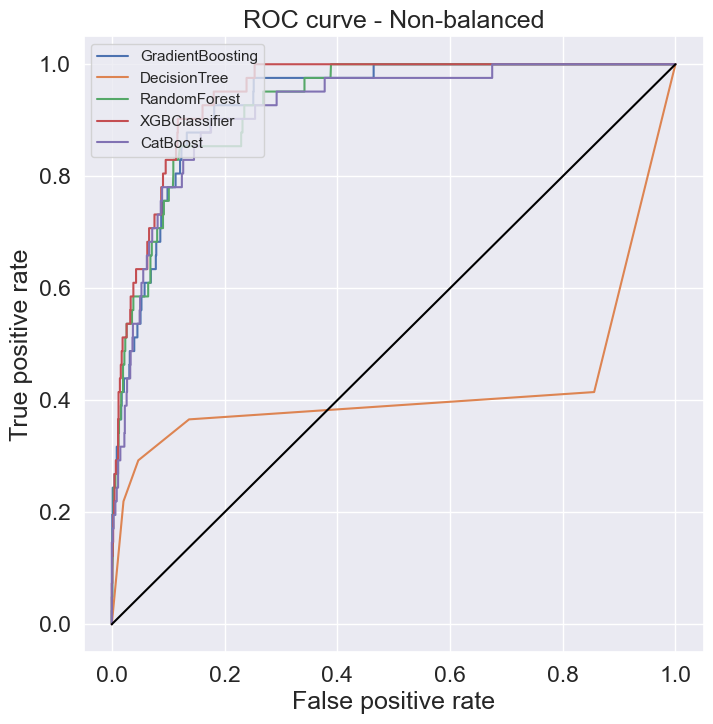

In [410]:
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')
models_report

In [411]:
#synthethically balancing the dataset and training Catboost on more iterations
smote = SMOTETomek()

In [412]:
X_train_synth, y_train_synth = smote.fit_resample(X_train, y_train)


In [413]:
y_train_synth.value_counts(normalize=True)

Bankrupt?
0    0.5
1    0.5
Name: proportion, dtype: float64

Processing GradientBoosting - Balanced
Processing DecisionTree - Balanced
Processing RandomForest - Balanced
Processing XGBClassifier - Balanced
0:	learn: 0.5695187	total: 19.8s	remaining: 2m 58s
1:	learn: 0.4644802	total: 35.6s	remaining: 2m 22s
2:	learn: 0.3872272	total: 51.7s	remaining: 2m
3:	learn: 0.3266180	total: 1m 9s	remaining: 1m 43s
4:	learn: 0.2801914	total: 1m 25s	remaining: 1m 25s
5:	learn: 0.2383956	total: 1m 41s	remaining: 1m 7s
8:	learn: 0.1665747	total: 3m 29s	remaining: 23.2s
9:	learn: 0.1492755	total: 3m 48s	remaining: 0us
Processing CatBoost - Balanced


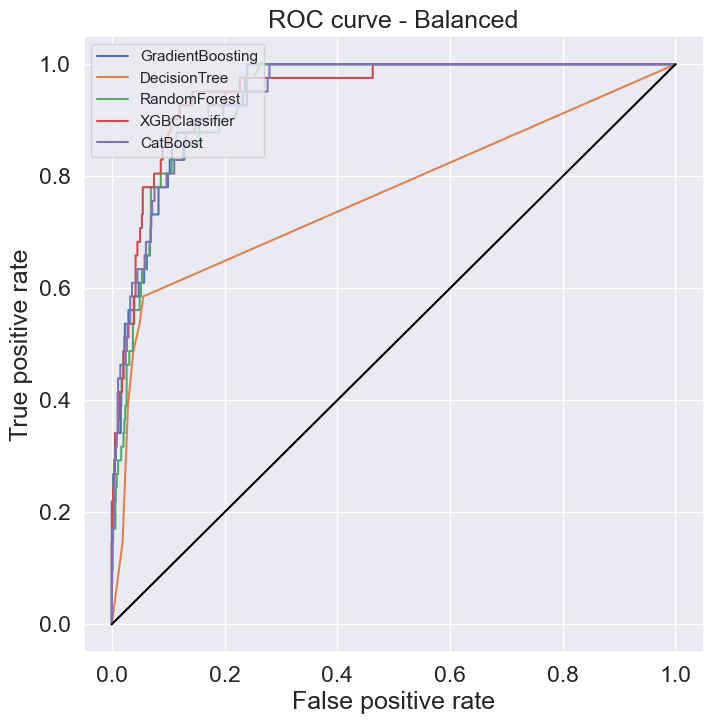

In [414]:
models_report, conf_matrix = run_models(X_train_synth, y_train_synth, X_test, y_test, model_type='Balanced')

In [416]:
models_report

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score
0,GradientBoosting,0.457245,0.945292,0.423077,0.536585,0.473118
0,DecisionTree,0.357385,0.765922,0.255319,0.585366,0.355556
0,RandomForest,0.374955,0.938364,0.2875,0.560976,0.380165
0,XGBClassifier,0.441854,0.949937,0.434783,0.487805,0.45977
0,CatBoost,0.407756,0.94364,0.252033,0.756098,0.378049


### XGBClassifier seems to return a better roc_auc_score and precision score, we will go with XGBClassifier

In [417]:
XGB = XGBClassifier()

In [418]:
XGB.fit(X_train_synth, y_train_synth)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [420]:
yhat = XGB.predict(X_test)

In [421]:
mean_squared_error(y_test, yhat)

0.036265432098765434

In [424]:
GBM = GradientBoostingClassifier(n_estimators=15, max_depth=15, max_features=0.3)

In [425]:
GBM.fit(X_train_synth, y_train_synth)

GradientBoostingClassifier(max_depth=15, max_features=0.3, n_estimators=15)

In [426]:
pred_gbm = GBM.predict(X_test)

In [427]:
mean_squared_error(y_test, pred_gbm)

0.046296296296296294

### Predicting on validation data

In [428]:
df_test.shape

(341, 96)

In [429]:
df_test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
6478,0.488422,0.560674,0.543230,0.631092,0.630587,0.999259,0.797519,0.809438,0.303145,0.781693,...,0.000598,0.623892,0.631088,0.841220,0.278398,0.026877,0.565539,1,0.036280,0
6479,0.522157,0.593000,0.581134,0.640568,0.640568,0.999152,0.797580,0.809498,0.303473,0.781764,...,0.000446,0.624016,0.640569,0.841885,0.275738,0.026791,0.565158,1,0.101822,0
6480,0.523863,0.579863,0.568874,0.606689,0.606689,0.999066,0.797498,0.809394,0.303512,0.781660,...,0.001124,0.623951,0.606689,0.842525,0.281004,0.026798,0.565190,1,0.025542,0
6481,0.434797,0.489097,0.484341,0.600477,0.600477,0.998868,0.797265,0.809199,0.303518,0.781465,...,0.001284,0.623760,0.600474,0.837586,0.279737,0.026768,0.565044,1,0.029377,0
6482,0.514308,0.584169,0.567857,0.607201,0.606603,0.999034,0.797600,0.809500,0.303756,0.781765,...,0.004205,0.624188,0.607198,0.841919,0.276440,0.026794,0.565171,1,0.065268,0


In [432]:
test_X = df_test.drop(columns='Bankrupt?')
val_X = df_test['Bankrupt?']

In [431]:
test_X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6478,0.488422,0.560674,0.543230,0.631092,0.630587,0.999259,0.797519,0.809438,0.303145,0.781693,...,0.812408,0.000598,0.623892,0.631088,0.841220,0.278398,0.026877,0.565539,1,0.036280
6479,0.522157,0.593000,0.581134,0.640568,0.640568,0.999152,0.797580,0.809498,0.303473,0.781764,...,0.830613,0.000446,0.624016,0.640569,0.841885,0.275738,0.026791,0.565158,1,0.101822
6480,0.523863,0.579863,0.568874,0.606689,0.606689,0.999066,0.797498,0.809394,0.303512,0.781660,...,0.823628,0.001124,0.623951,0.606689,0.842525,0.281004,0.026798,0.565190,1,0.025542
6481,0.434797,0.489097,0.484341,0.600477,0.600477,0.998868,0.797265,0.809199,0.303518,0.781465,...,0.765636,0.001284,0.623760,0.600474,0.837586,0.279737,0.026768,0.565044,1,0.029377
6482,0.514308,0.584169,0.567857,0.607201,0.606603,0.999034,0.797600,0.809500,0.303756,0.781765,...,0.828278,0.004205,0.624188,0.607198,0.841919,0.276440,0.026794,0.565171,1,0.065268


In [433]:
val_X

6478    0
6479    0
6480    0
6481    0
6482    0
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 341, dtype: int64

In [434]:
val_pred = XGB.predict(test_X)

In [435]:
val_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Checking the predicions

In [439]:
val_pred_prob = XGB.predict_proba(test_X)

In [440]:
roc_auc_score(val_X, val_pred_prob[:, 1])

0.9153279785809906

In [441]:
#checking for GradientBoosting
gbm_pred = GBM.predict(test_X)
gbm_pred_prob = GBM.predict_proba(test_X)[:, 1]

roc_auc_score(val_X, gbm_pred_prob)

0.9661981258366801

### GBM performs better on the validaton set than XGB. We will pull all the predictions into a new datframe

In [468]:
check_df = pd.DataFrame()

In [469]:
check_df['Original_Values'] = val_X
check_df['GBM_Predicions'] = gbm_pred
check_df['XGB_Predictions']  = val_pred

In [471]:
pred_df = check_df.reset_index().drop(columns='index' )

In [472]:
pred_df 

,Original_Values,GBM_Predicions,XGB_Predictions
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
336,0,0,0
337,0,0,0
338,0,0,0
339,0,0,0


In [473]:
pred_df.to_csv('Bankruptcy Predictions.csv')

In [474]:
#saving gradient boosting model

gbm = GBM.fit(X_train_synth, y_train_synth)
joblib.dump(gbm, 'GBM_Bankruptcy_Model.pkl')  

['GBM_Bankruptcy_Model.pkl']

In [475]:
XGB = XGB.fit(X_train_synth, y_train_synth)
joblib.dump(XGB, 'XGB_Bankruptcy_Model.pkl')

['XGB_Bankruptcy_Model.pkl']

In [476]:
#to load the model
xgb_load = joblib.load('XGB_Bankruptcy_Model.pkl')

In [477]:
xgb_load

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)